In [1]:
# create species annotation class
import libsbml
import numpy as np
import os
import pickle
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline  

PROJ_DIR = "/Users/woosubs/Desktop/AutomateAnnotation/AnnotationRecommender/"
MOD_DIR = os.path.join(PROJ_DIR, "annotation_recommender")
sys.path.append(MOD_DIR)

BIOMD_12 = 'BIOMD0000000012.xml'
BASE_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/'
DATA_DIR = os.path.join(BASE_DIR, "DATA")
ALGO_DIR = os.path.join(DATA_DIR, "algo")
CHEBI_DIR = os.path.join(DATA_DIR, "chebi")
RHEA_DIR = os.path.join(DATA_DIR, "rhea")
BIOMODEL_DIR = os.path.join(DATA_DIR, "biomodels/curated_biomodels_31mar2021")
BIGG_DIR = '/Users/woosubs/Desktop/AutomateAnnotation/DATA/bigg'
ecoli_fpath = os.path.join(BIGG_DIR, "e_coli_core.xml")


from annotation_recommender import species_annotation as sa
from annotation_recommender import reaction_annotation as ra
from annotation_recommender import constants as cn
from annotation_recommender import iterator as it
from annotation_recommender import tools

# chebi to shortened formula
with open(os.path.join(CHEBI_DIR, 'chebi_shortened_formula_30apr2022.pickle'), 'rb') as f:
  ref_shortened_chebi_to_formula = pickle.load(f)
# shortened formula to chebi
with open(os.path.join(CHEBI_DIR, 'shortened_formula_to_chebis_20jul2022.pickle'), 'rb') as f:
  ref_shortened_formula_to_chebi = pickle.load(f)

with open(os.path.join(CHEBI_DIR, 'chebi_synonyms.pickle'), 'rb') as f:
  chebi_synonyms = pickle.load(f)
chebi_low_synonyms = dict()
for one_k in chebi_synonyms.keys():
  chebi_low_synonyms[one_k] = list(set([val.lower() for val in chebi_synonyms[one_k]]))

with open(os.path.join(RHEA_DIR, 'kegg2rhea_master.pickle'), 'rb') as handle:
  ref_kegg2rhea_master = pickle.load(handle)
with open(os.path.join(RHEA_DIR, 'kegg2rhea_bi.pickle'), 'rb') as handle:
  ref_kegg2rhea_bi = pickle.load(handle)

# load reference matrix
with open(os.path.join(ALGO_DIR, 'binary_ref_df.pickle'), 'rb') as handle:
    ref_mat = pickle.load(handle)
# check its shape
print(ref_mat.shape)

(13651, 3790)


In [2]:
# specanot = sa.SpeciesAnnotation(libsbml_fpath=ecoli_fpath)
# reacanot = ra.ReactionAnnotation(libsbml_fpath=ecoli_fpath)

# spec_pred_annotations = specanot.predictAnnotationByName(inp_spec_list=None)
# reac_pred_annotations = reacanot.predictAnnotation(inp_spec_dict=specanot.formula,
#                                                    inp_reac_list=None,
#                                                    inp_ref_mat=ref_mat,
#                                                    update=True)

In [3]:
# res = it.iterateAndGetUpdatedResults(spec_cl=specanot,
#                                      reac_cl=reacanot,
#                                      num_iter=10,
#                                      show_message=True)

## Evaluate BioModels :) 

In [31]:
# Try one biomodel
one_biomd = 'BIOMD0000000691.xml'
one_biomd_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
species_an = sa.SpeciesAnnotation(libsbml_fpath=one_biomd_fpath)
reaction_an = ra.ReactionAnnotation(libsbml_fpath=one_biomd_fpath)
pred_species = species_an.predictAnnotationByName()
pred_reaction = reaction_an.predictAnnotation(inp_spec_dict=species_an.formula)

In [34]:
model = species_an.model
print([val.name for val in model.getListOfSpecies()])
print("So that's why it couldn't be predicted based on name")

['S1', 'S1', 'S2', 'S2', 'S3', 'S3', 'S4', 'S4', 'N2', 'N2', 'A3', 'A3', 'S4_ex', 'A', 'N', 'N1', 'N1', 'A2', 'A2']
So that's why it couldn't be predicted based on name


In [6]:
res = it.iterateAndGetUpdatedResults(spec_cl=species_an,
                                     reac_cl=reaction_an,
                                     num_iter=10,
                                     show_message=True)

Initial match score: 7.89
*************************
Iteration 1
Updated match score: 8.52
*************************
Iteration 2
Updated match score: 8.52
Score not increasing. Quitting iteration...

Calculation finished.


In [7]:
# Update annotations using res, and compute accuracy; Repeat for all biomodels

In [8]:
print(species_an.getAccuracy(pred_annotation=res['spec_formula']))
print(reaction_an.getAccuracy(pred_annotation=res['candidates']))

0.0
0.0


In [2]:
# Try all biomodels:
biomd_keggs = pd.read_csv(
    os.path.join(BASE_DIR, 'reaction_recommender/reaction_recommender/notebook/biomodels_to_use.csv'),
    index_col=0)
biomodels_to_load = []
for one_idx in biomd_keggs.index:
  if biomd_keggs.loc[one_idx, 'chebi_kegg']:
    biomodels_to_load.append(one_idx)

In [16]:
for idx, md in enumerate(biomd_keggs[biomd_keggs['chebi_kegg']==True].index.sort_values()):
  print("%s. %s" % (str(idx+1), md))

1. BIOMD0000000013.xml
2. BIOMD0000000015.xml
3. BIOMD0000000017.xml
4. BIOMD0000000018.xml
5. BIOMD0000000023.xml
6. BIOMD0000000038.xml
7. BIOMD0000000042.xml
8. BIOMD0000000046.xml
9. BIOMD0000000051.xml
10. BIOMD0000000061.xml
11. BIOMD0000000063.xml
12. BIOMD0000000064.xml
13. BIOMD0000000070.xml
14. BIOMD0000000071.xml
15. BIOMD0000000081.xml
16. BIOMD0000000088.xml
17. BIOMD0000000094.xml
18. BIOMD0000000108.xml
19. BIOMD0000000122.xml
20. BIOMD0000000123.xml
21. BIOMD0000000137.xml
22. BIOMD0000000143.xml
23. BIOMD0000000171.xml
24. BIOMD0000000172.xml
25. BIOMD0000000191.xml
26. BIOMD0000000206.xml
27. BIOMD0000000211.xml
28. BIOMD0000000213.xml
29. BIOMD0000000225.xml
30. BIOMD0000000236.xml
31. BIOMD0000000244.xml
32. BIOMD0000000247.xml
33. BIOMD0000000248.xml
34. BIOMD0000000268.xml
35. BIOMD0000000292.xml
36. BIOMD0000000450.xml
37. BIOMD0000000471.xml
38. BIOMD0000000472.xml
39. BIOMD0000000473.xml
40. BIOMD0000000503.xml
41. BIOMD0000000590.xml
42. BIOMD0000000602.xml
4

Index(['kegg_kegg', 'chebi_kegg', 'chebi_species'], dtype='object')

In [ ]:
iter_nu

In [17]:
res['sum_match_score']

8.523809523809524

In [ ]:
# TODO: maybe add number of species/reactions evaluated

In [97]:
res_df = pd.DataFrame(0,
                      index=biomodels_to_load,
                      columns=['spec_accuracy', 'reac_accuracy',
                               'iter_num', 'species_match_score', 'reaction_match_score',
                               'num_species', 'num_eval_species',
                               'num_reactions', 'num_eval_reactions', 'total_match_score'])
for idx, one_biomd in enumerate(biomodels_to_load):
  if idx % 5 == 0:
    print("We are at", idx)
  one_biomd_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  species_an = sa.SpeciesAnnotation(libsbml_fpath=one_biomd_fpath)
  reaction_an = ra.ReactionAnnotation(libsbml_fpath=one_biomd_fpath)
  pred_species = species_an.predictAnnotationByName()
  pred_reaction = reaction_an.predictAnnotation(inp_spec_dict=species_an.formula)
  res = it.iterateAndGetUpdatedResults(spec_cl=species_an,
                                       reac_cl=reaction_an,
                                       num_iter=5,
                                       show_message=False)
  res_df.loc[one_biomd, 'spec_accuracy'] = species_an.getAccuracy(pred_annotation=res['spec_formula'])
  res_df.loc[one_biomd, 'reac_accuracy'] = reaction_an.getAccuracy(pred_annotation=res['candidates'])
  res_df.loc[one_biomd, 'iter_num'] = res['rep']
  res_df.loc[one_biomd, 'species_match_score'] = np.mean([species_an.match_score[val] for val in species_an.match_score.keys()])
  res_df.loc[one_biomd, 'reaction_match_score'] = res['sum_match_score'] / reaction_an.model.getNumReactions()
  res_df.loc[one_biomd, 'num_species'] = species_an.model.getNumSpecies() 
  res_df.loc[one_biomd, 'num_eval_species'] = len(species_an.exist_annotation)
  res_df.loc[one_biomd, 'num_reactions'] = reaction_an.model.getNumReactions()
  res_df.loc[one_biomd, 'num_eval_reactions'] = len(reaction_an.exist_annotation)
  res_df.loc[one_biomd, 'total_match_score'] = res['sum_match_score']

We are at 0
We are at 5
We are at 10
We are at 15
We are at 20
We are at 25
We are at 30
We are at 35
We are at 40
We are at 45


In [ ]:
# res_df.to_csv("eval_iter_algorithms2.csv")

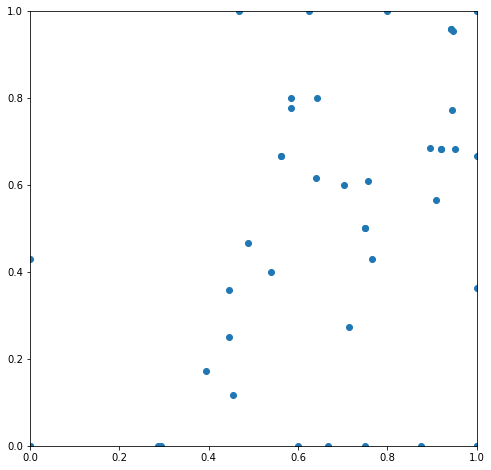

In [121]:
plt.figure(figsize=(8, 8))
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
# plt.scatter(res_df.species_match_score, res_df.reaction_match_score)
plt.scatter(res_df.spec_accuracy, res_df.reac_accuracy)

In [243]:
null_res_df = res_df[res_df['reac_accuracy']==0].copy()
null_res_df.sort_values(by=['reac_accuracy', 'spec_accuracy'], inplace=True)
null_res_df

,spec_accuracy,reac_accuracy,iter_num,species_match_score,reaction_match_score,num_species,num_eval_species,num_reactions,num_eval_reactions,total_match_score
BIOMD0000000691.xml,0.000000,0.0,2,0.768421,0.473545,19,12,18,6,8.523810
BIOMD0000000094.xml,0.000000,0.0,2,0.487289,0.702063,34,2,45,2,31.592857
BIOMD0000000171.xml,0.000000,0.0,2,0.613315,0.493132,12,2,26,4,12.821429
BIOMD0000000248.xml,0.285714,0.0,2,0.785185,0.883333,9,7,5,1,4.416667
BIOMD0000000088.xml,0.294118,0.0,2,0.484809,0.751861,105,17,110,18,82.704762
BIOMD0000000108.xml,0.600000,0.0,1,0.704125,0.649020,9,5,17,1,11.033333
BIOMD0000000137.xml,0.666667,0.0,1,0.511878,0.281667,21,3,20,1,5.633333
BIOMD0000000038.xml,0.750000,0.0,2,0.683613,0.681429,17,4,10,2,6.814286
BIOMD0000000143.xml,0.875000,0.0,1,0.916506,0.745833,20,16,20,3,14.916667
BIOMD0000000292.xml,1.000000,0.0,1,0.736111,0.854167,6,4,4,1,3.416667


In [244]:
# null_res_df.to_csv("null_res.csv")

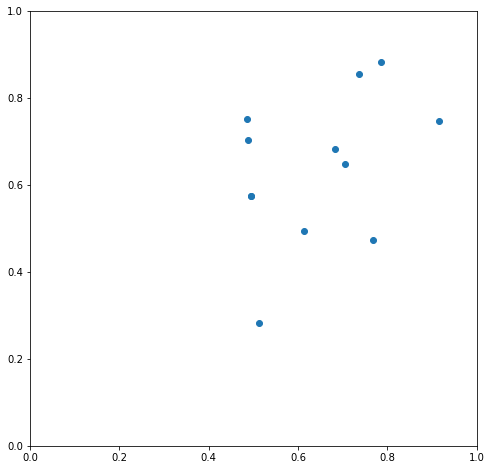

In [118]:
plt.figure(figsize=(8, 8))
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(null_res_df['species_match_score'], null_res_df['reaction_match_score'])

In [77]:
# Do  this again for only evaluatable species and reactions

['BIOMD0000000691.xml', 'BIOMD0000000292.xml', 'BIOMD0000000094.xml', 'BIOMD0000000123.xml', 'BIOMD0000000248.xml', 'BIOMD0000000171.xml', 'BIOMD0000000143.xml', 'BIOMD0000000137.xml', 'BIOMD0000000088.xml', 'BIOMD0000000038.xml', 'BIOMD0000000108.xml', 'BIOMD0000000122.xml']


In [142]:
init_match_score = {val:reaction_an.match_score[val] for val in reaction_an.exist_annotation}
reaction_an.getMatchScore(init_match_score)

6.8

In [143]:
reaction_an.sum_match_score

18.18333333333333

In [138]:
res.keys()

dict_keys(['candidates', 'spec_formula', 'spec_chebi2update', 'sum_match_score', 'rep'])

In [150]:
eval_res_df = pd.DataFrame(0,
                           index=null_res_df.index,
                           columns=['spec_accuracy', 'reac_accuracy',
                                    'iter_num', 'species_match_score', 'reaction_match_score',
                                    'num_species', 'num_eval_species',
                                    'num_reactions', 'num_eval_reactions', 'total_match_score'])
# second version that only stores evaluatable values
for idx, one_biomd in enumerate(null_res_df.index):
  print("We are at", idx)
  one_biomd_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  species_an = sa.SpeciesAnnotation(libsbml_fpath=one_biomd_fpath)
  reaction_an = ra.ReactionAnnotation(libsbml_fpath=one_biomd_fpath)
  pred_species = species_an.predictAnnotationByName()
  pred_reaction = reaction_an.predictAnnotation(inp_spec_dict=species_an.formula)
  res = it.iterateAndGetUpdatedResults(spec_cl=species_an,
                                       reac_cl=reaction_an,
                                       num_iter=5,
                                       show_message=False)
  eval_pred_spec = {val:res['spec_formula'][val] for val in species_an.exist_annotation}
  eval_pred_reac = {val:res['candidates'][val] for val in reaction_an.exist_annotation}
  eval_res_df.loc[one_biomd, 'spec_accuracy'] = species_an.getAccuracy(pred_annotation=eval_pred_spec)
  eval_res_df.loc[one_biomd, 'reac_accuracy'] = reaction_an.getAccuracy(pred_annotation=eval_pred_reac)
  eval_res_df.loc[one_biomd, 'iter_num'] = res['rep']
  eval_res_df.loc[one_biomd, 'species_match_score'] = np.mean([species_an.match_score[val] for val in eval_pred_spec.keys()])
  # iterator didn't store full match  scores, so just used initial values. for this... :(
  init_match_score = {val:reaction_an.match_score[val] for val in reaction_an.exist_annotation}
  init_sum_match_score = reaction_an.getMatchScore(init_match_score)
  eval_res_df.loc[one_biomd, 'reaction_match_score'] = init_sum_match_score / len(reaction_an.exist_annotation)
  eval_res_df.loc[one_biomd, 'num_species'] = species_an.model.getNumSpecies() 
  eval_res_df.loc[one_biomd, 'num_eval_species'] = len(species_an.exist_annotation)
  eval_res_df.loc[one_biomd, 'num_reactions'] = reaction_an.model.getNumReactions()
  eval_res_df.loc[one_biomd, 'num_eval_reactions'] = len(reaction_an.exist_annotation)
  eval_res_df.loc[one_biomd, 'total_match_score'] = init_sum_match_score

We are at 0
We are at 1
We are at 2
We are at 3
We are at 4
We are at 5
We are at 6
We are at 7
We are at 8
We are at 9
We are at 10
We are at 11


In [151]:
eval_res_df

,spec_accuracy,reac_accuracy,iter_num,species_match_score,reaction_match_score,num_species,num_eval_species,num_reactions,num_eval_reactions,total_match_score
BIOMD0000000691.xml,0.000000,0.0,2,0.666667,0.422222,19,12,18,6,2.533333
BIOMD0000000094.xml,0.000000,0.0,2,0.700000,0.875000,34,2,45,2,1.750000
BIOMD0000000171.xml,0.000000,0.0,2,0.562500,0.729167,12,2,26,4,2.916667
BIOMD0000000248.xml,0.285714,0.0,2,0.838095,0.750000,9,7,5,1,0.750000
BIOMD0000000088.xml,0.294118,0.0,2,0.566394,0.972222,105,17,110,18,17.500000
BIOMD0000000108.xml,0.600000,0.0,1,0.733333,0.500000,9,5,17,1,0.500000
BIOMD0000000137.xml,0.666667,0.0,1,0.566138,0.400000,21,3,20,1,0.400000
BIOMD0000000038.xml,0.750000,0.0,2,0.854167,0.547619,17,4,10,2,1.095238
BIOMD0000000143.xml,0.875000,0.0,1,0.936364,0.916667,20,16,20,3,2.750000
BIOMD0000000292.xml,1.000000,0.0,1,0.854167,0.875000,6,4,4,1,0.875000


In [171]:
one_biomd = 'BIOMD0000000691.xml'
one_biomd_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
species_an = sa.SpeciesAnnotation(libsbml_fpath=one_biomd_fpath)
reaction_an = ra.ReactionAnnotation(libsbml_fpath=one_biomd_fpath)
pred_species = species_an.predictAnnotationByName()
pred_reaction = reaction_an.predictAnnotation(inp_spec_dict=species_an.formula)

In [172]:
species_an.match_score

{'S1__Cell_1_': 0.5,
 'S1__Cell_2_': 0.5,
 'S2__Cell_1_': 1.0,
 'S2__Cell_2_': 1.0,
 'S3__Cell_1_': 1.0,
 'S3__Cell_2_': 1.0,
 'S4__Cell_1_': 1.0,
 'S4__Cell_2_': 1.0,
 'N2__Cell_1_': 1.0,
 'N2__Cell_2_': 1.0,
 'A3__Cell_1_': 0.5,
 'A3__Cell_2_': 0.5,
 'S4_ex': 0.6,
 'A': 1.0,
 'N': 1.0,
 'N1__Cell_1_': 0.5,
 'N1__Cell_2_': 0.5,
 'A2__Cell_1_': 0.5,
 'A2__Cell_2_': 0.5}

In [174]:
species_an.candidates['S2__Cell_1_']

['CHEBI:29387']

In [175]:
species_an.candidates['A']

['CHEBI:16708',
 'CHEBI:16977',
 'CHEBI:13193',
 'CHEBI:16449',
 'CHEBI:46217',
 'CHEBI:62885']

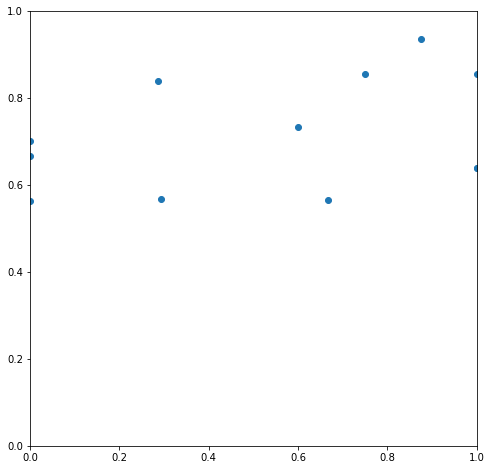

In [245]:
plt.figure(figsize=(8, 8))
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(eval_res_df.spec_accuracy, eval_res_df.species_match_score)

In [246]:
# plt.scatter(eval_res_df.reac_accuracy, eval_res_df.reaction_match_score)

In [180]:
total_specs = 0
for idx, one_biomd in enumerate(biomodels_to_load):
#   print("We are at", idx)
  one_biomd_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  species_an = sa.SpeciesAnnotation(libsbml_fpath=one_biomd_fpath)
  total_specs = total_specs + len(species_an.exist_annotation)
print(total_specs)

1699


In [199]:
# for all species of all models; test 
# len_word is either name or id depending on availability
eval_spec_res = pd.DataFrame(0, index=range(total_specs),
                             columns=['model', 'species_id', 'species_name',
                                      'len_word', 'match_score', 'num_cands',
                                      'accuracy'])
idx_val = 0
for idx, one_biomd in enumerate(biomodels_to_load):
  if idx % 5 == 0:
    print("We are at", idx)
  one_biomd_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
  species_an = sa.SpeciesAnnotation(libsbml_fpath=one_biomd_fpath)
  pred_species = species_an.predictAnnotationByName(inp_spec_list=list(species_an.exist_annotation.keys()))  
  for one_spec in species_an.candidates.keys():
    eval_spec_res.loc[idx_val, 'model'] = one_biomd
    eval_spec_res.loc[idx_val, 'species_id'] = one_spec
    one_spec_name = species_an.model.getSpecies(one_spec).name.lower()
    if len(one_spec_name) == 0:
      one_spec_name = one_spec
    eval_spec_res.loc[idx_val, 'species_name'] = one_spec_name
    eval_spec_res.loc[idx_val, 'len_word'] = len(one_spec_name)
    eval_spec_res.loc[idx_val, 'match_score'] = species_an.match_score[one_spec]
    eval_spec_res.loc[idx_val, 'num_cands'] = len(species_an.candidates[one_spec])
    common_cands = set(species_an.formula[one_spec]).intersection(species_an.exist_annotation[one_spec])
    acc = 1 if len(common_cands)>0 else 0
    eval_spec_res.loc[idx_val, 'accuracy'] = acc
    idx_val = idx_val + 1

We are at 0
We are at 5
We are at 10
We are at 15
We are at 20
We are at 25
We are at 30
We are at 35
We are at 40
We are at 45


In [200]:
eval_spec_res

,model,species_id,species_name,len_word,match_score,num_cands,accuracy
0,BIOMD0000000172.xml,GLCo,glc(ext),8,0.500000,15,0
1,BIOMD0000000172.xml,GLCi,glc(int),8,0.500000,20,0
2,BIOMD0000000172.xml,ATP,atp,3,1.000000,2,1
3,BIOMD0000000172.xml,G6P,glu6p,5,0.800000,1,1
4,BIOMD0000000172.xml,ADP,adp,3,1.000000,3,1
...,...,...,...,...,...,...,...
1694,BIOMD0000000061.xml,ACAX,extracellular acetaldehyde,26,0.653846,1,0
1695,BIOMD0000000061.xml,CNX,extracellular cyanide,21,0.571429,2,0
1696,BIOMD0000000061.xml,AMP,amp,3,1.000000,3,1
1697,BIOMD0000000061.xml,CNX0,mixed flow cyanide,18,0.611111,1,0


In [204]:
np.sum(eval_spec_res.accuracy)

1401

In [247]:
# plt.scatter(eval_spec_res.len_word, eval_spec_res.accuracy)

In [250]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV

df_0 = eval_spec_res[eval_spec_res['accuracy']==0] 
df_1 = eval_spec_res[eval_spec_res['accuracy']==1]

clf_res = []
for _ in range(10):
  df_sel_comb = pd.concat([df_0, df_1.sample(n=df_0.shape[0], replace=False)], axis=0, join='inner')

  X = df_sel_comb[['match_score', 'num_cands']]
  y = df_sel_comb['accuracy']

  clf = LogisticRegressionCV(cv=10, random_state=0, class_weight='balanced').fit(X, y)
  clf_res.append(clf.score(X, y))
print(clf_res)
print(np.mean(clf_res))
  

[0.8338926174496645, 0.8238255033557047, 0.8322147651006712, 0.8288590604026845, 0.8355704697986577, 0.8187919463087249, 0.8271812080536913, 0.8355704697986577, 0.8305369127516778, 0.8187919463087249]
0.8285234899328859


In [ ]:
# Can you also show if species names are updated, will it yield correct result?
# Doing it manually (demo)
# => include it to the flowchart
# Look into which variable is important (weight)??

In [201]:
# eval_spec_res.to_csv("eval_species_annotation.csv")

In [182]:
len(species_an.exist_annotation)

25

In [26]:
# res_df.to_csv("eval_iter_algorithms.csv")

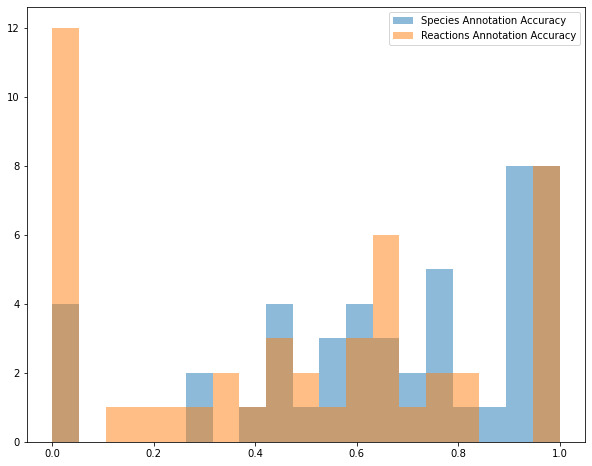

In [30]:
plt.figure(figsize=(10, 8))
bins = np.linspace(0.0, 1.0, 20)
plt.hist(res_df['spec_accuracy'], bins, alpha=0.5, label='Species Annotation Accuracy')
plt.hist(res_df['reac_accuracy'], bins, alpha=0.5, label='Reactions Annotation Accuracy')
plt.legend(loc='upper right')
plt.show()

In [58]:
one_biomd = 'BIOMD0000000248.xml'
one_biomd_fpath = os.path.join(BIOMODEL_DIR, one_biomd)
species_an = sa.SpeciesAnnotation(libsbml_fpath=one_biomd_fpath)
reaction_an = ra.ReactionAnnotation(libsbml_fpath=one_biomd_fpath)

model = species_an.model
print(model.getNumSpecies())
print(model.getNumReactions())
pred_species = species_an.predictAnnotationByName()
pred_reaction = reaction_an.predictAnnotation(inp_spec_dict=species_an.formula)
res = it.iterateAndGetUpdatedResults(spec_cl=species_an,
                                   reac_cl=reaction_an,
                                   num_iter=5,
                                   show_message=False)

9
5


In [63]:
species_an.exist_annotation

{'ATP': ['C10N5O13P3'],
 'PCr': ['C4N3O5P'],
 'ADP': ['C10N5O10P2'],
 'Cr': ['C4N3O2'],
 'Pi': ['O4P'],
 'CFcap': ['O2'],
 'CFtis': ['O2']}

In [61]:
reaction_an.exist_annotation

{'CreatineKinase': ['RHEA:17160']}

In [64]:
one_rid = 'CreatineKinase'
comps = reaction_an.getReactionComponents(one_rid)
print("Species associated with reaction %s:" % one_rid, comps)

Species associated with reaction CreatineKinase: ['PCr', 'ATP', 'ADP', 'Cr']


In [69]:
for one_comp in comps:
  print("For %s in the model, algorithm found %s" % (one_comp, species_an.formula[one_comp]))
  if set(species_an.exist_annotation[one_comp]).intersection(set(species_an.formula[one_comp])):
    print("It was correct")
  print("It wasn't correct!")

For PCr in the model, algorithm found ['C13N2O2', 'C5N.ClCrO3', 'C9N3O8P', 'C22NO2', 'C6Cl5O', 'C17N', 'C6Cl5', 'C5NO2', 'C9N5O3S', 'C34N9O18S4', 'C3', 'Pr', 'C2Cl4', 'Cr', 'C5NO4P', 'C10NO8PR2', 'C18N5O10S2', 'C10N5O3', 'C16N2O4S', 'C21O2', 'C14O5', '(C6O2)n', 'C11N5O3']
It wasn't correct!
For ATP in the model, algorithm found ['C10N5O13P3']
It was correct
It wasn't correct!
For ADP in the model, algorithm found ['C12N3O6', 'C10N5O10P2']
It was correct
It wasn't correct!
For Cr in the model, algorithm found ['C9N5O3S', 'Cr']
It wasn't correct!


In [70]:
species_an.candidates['Cr']

['CHEBI:157802', 'CHEBI:28073']

In [241]:
# print(species_an.formula['NADP_c'])
# reaction_an.match_score['R7']

In [242]:
null_res_df.index

Index(['BIOMD0000000691.xml', 'BIOMD0000000094.xml', 'BIOMD0000000171.xml',
       'BIOMD0000000248.xml', 'BIOMD0000000088.xml', 'BIOMD0000000108.xml',
       'BIOMD0000000137.xml', 'BIOMD0000000038.xml', 'BIOMD0000000143.xml',
       'BIOMD0000000292.xml', 'BIOMD0000000123.xml', 'BIOMD0000000122.xml'],
      dtype='object')